# 🚧 Analyse av personskader og vegtilstand
Dette notatbok inneholder analyser av data om personskader relatert til ulike typer vegdekke og vegkategori.Data kommer fra Statens Vegvesen.

## 📦 Import og opprydding

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("skder_vegtilstand_ny.csv", delimiter=";", skiprows=6)
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.rename(columns={"Skadegrad": "År"}, inplace=True)

for col in ["Drept", "Hardt skadd", "Lettere skadd", "Sum"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["År"] = pd.to_numeric(df["År"], errors="coerce")
df.head()

,År,VegKategori,Vegdekke,Drept,Hardt skadd,Lettere skadd,Sum
0,2024.0,E Europaveg,"Asfalt, oljegrus",0.0,0.0,0.0,0.0
1,2024.0,E Europaveg,Grus,0.0,0.0,0.0,0.0
2,2024.0,E Europaveg,Gatestein,0.0,0.0,0.0,0.0
3,2024.0,E Europaveg,"Betong, betongstein",0.0,0.0,0.0,0.0
4,2024.0,E Europaveg,Annet dekke,0.0,0.0,0.0,0.0


## 🔹 Analyse 1: Totalt antall skader per vegkategori

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_29756\1612514198.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="VegKategori", y="Sum", estimator="sum", ci=None)


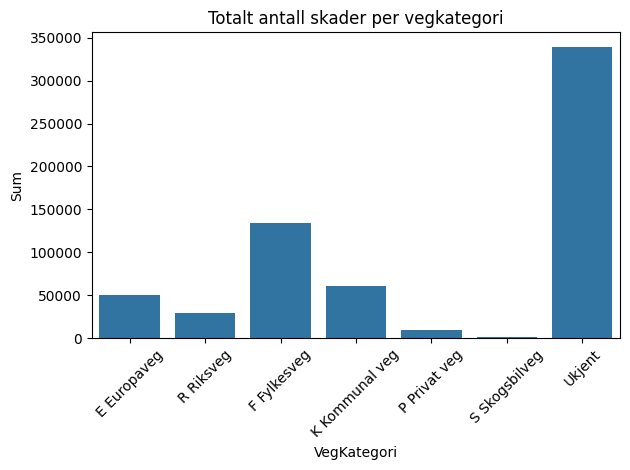

In [14]:
sns.barplot(data=df, x="VegKategori", y="Sum", estimator="sum", ci=None)
plt.title("Totalt antall skader per vegkategori")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔹 1. Totalt antall skader per vegkategori

**Observasjon:**  
Kategoriene **F fylkesveg** og **Ukjent** har klart flest rapporterte skader.

**Tolkning:**  
Fylkesveger dekker store geografiske områder og brukes av mange. Den store andelen "Ukjent" kan skyldes manglende dataregistrering, som igjen gjør risikobildet uklart.


## 🔹 Analyse 2: Totalt antall skader per vegdekke

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_29756\474140982.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Vegdekke", y="Sum", estimator="sum", ci=None)


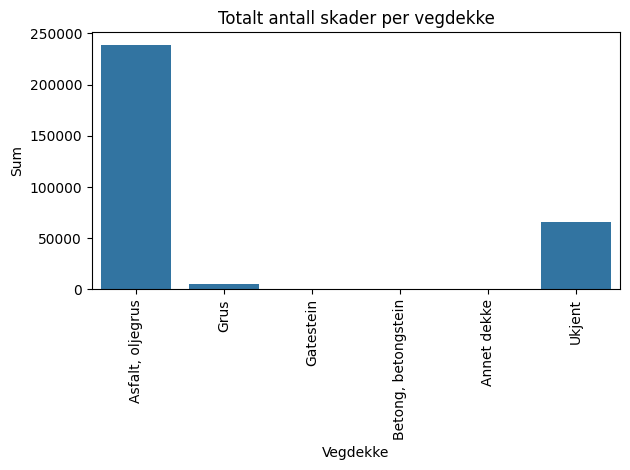

In [15]:
sns.barplot(data=df, x="Vegdekke", y="Sum", estimator="sum", ci=None)
plt.title("Totalt antall skader per vegdekke")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 🔹 2. Totalt antall skader per vegdekke

**Observasjon:**  
**Asfalt og oljegrus** står for klart flest skader.

**Tolkning:**  
Dette er de vanligste vegdekkene i landet, og reflekterer dermed høy eksponering. Det betyr ikke nødvendigvis høyest risiko per kilometer kjørt.

## 🔹 Analyse 3: Andel hardt skadde per vegkategori

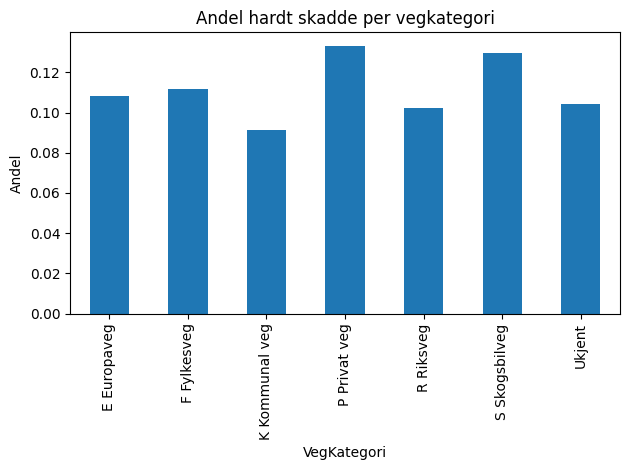

In [5]:
pivot = df.groupby("VegKategori")[["Hardt skadd", "Sum"]].sum()
pivot["Andel_hardt"] = pivot["Hardt skadd"] / pivot["Sum"]
pivot["Andel_hardt"].plot(kind="bar", title="Andel hardt skadde per vegkategori")
plt.ylabel("Andel")
plt.tight_layout()
plt.show()

## 🔹 3. Andel hardt skadde per vegkategori

**Observasjon:**  
**Privat veg** og **skogsbilveg** har høyest andel hardt skadde.

**Tolkning:**  
Slike veier har ofte dårligere standard, smale kjørebaner og manglende sikkerhetstiltak. Selv om de har færre ulykker totalt, blir utfallet ofte mer alvorlig.

## 🔹 Analyse 4: Antall drepte etter vegkategori og dekke

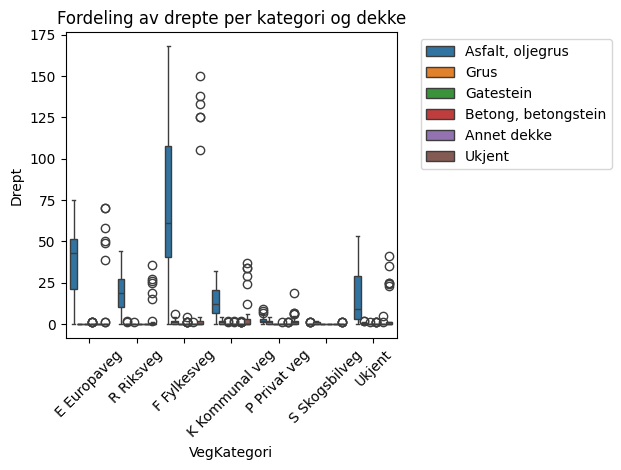

In [6]:
sns.boxplot(data=df, x="VegKategori", y="Drept", hue="Vegdekke")
plt.title("Fordeling av drepte per kategori og dekke")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 🔹 4. Drepte per vegkategori og dekke

**Observasjon:**  
**Grus og ukjent dekke** har stor variasjon og mange tilfeller med høyere dødstall.

**Tolkning:**  
Manglende friksjon og ustabile underlag kan forklare risikoøkning. "Ukjent" peker igjen på datakvalitetsutfordringer som kan skjule reell risiko.


## 🔹 Analyse 5: Utvikling i skader over år

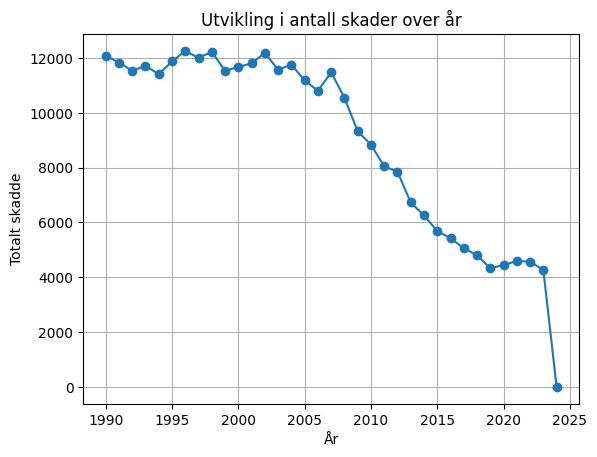

In [7]:
df_year = df.groupby("År")["Sum"].sum().dropna()
df_year.plot(marker="o", title="Utvikling i antall skader over år")
plt.ylabel("Totalt skadde")
plt.grid()
plt.show()

## 🔹 5. Utvikling i antall skader over år

**Observasjon:**  
Det er en tydelig nedgang fra 2007 til 2020, og et bratt fall etter 2020.

**Tolkning:**  
Mulige årsaker er økt trafikksikkerhet, færre trafikanter (pandemieffekt), eller endringer i rapportering. Nedgangen etter 2020 kan også skyldes manglende registrering for nyere år.

## 🔹 Analyse 6: Skader etter kombinasjon av vegkategori og dekke

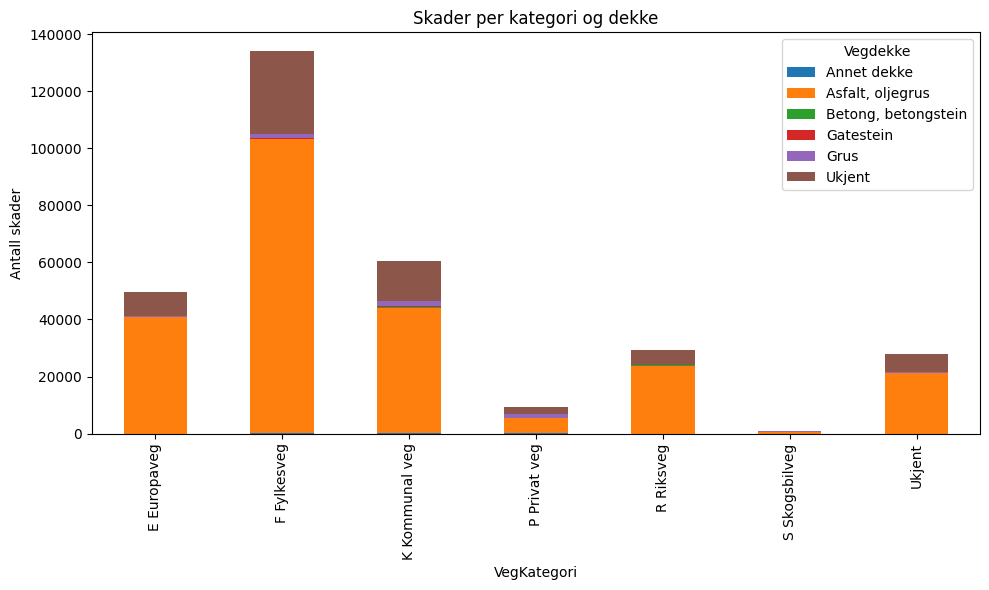

In [8]:
pivot2 = df.pivot_table(index="VegKategori", columns="Vegdekke", values="Sum", aggfunc="sum")
pivot2.plot(kind="bar", stacked=True, figsize=(10,6), title="Skader per kategori og dekke")
plt.ylabel("Antall skader")
plt.tight_layout()
plt.show()

## 🔹 6. Skader etter kombinasjon av vegkategori og dekke

**Observasjon:**  
"Asfalt på fylkesveg" er den vanligste kombinasjonen, fulgt av "asfalt på kommunal veg".

**Tolkning:**  
Denne kombinasjonen utgjør en stor andel av vegnettet. Grusdekke i visse kategorier (som privat- eller skogsbilveg) peker på mulige sikkerhetsutfordringer.

## 🔹 Analyse 7: Høyest skader per rad

In [9]:
df.sort_values("Sum", ascending=False).head(10)

,År,VegKategori,Vegdekke,Drept,Hardt skadd,Lettere skadd,Sum
1470,NaN,Ukjent,NaN,7523.0,32780.0,271300.0,311603.0
852,2004.0,F Fylkesveg,"Asfalt, oljegrus",116.0,438.0,4482.0,5036.0
936,2002.0,F Fylkesveg,"Asfalt, oljegrus",129.0,531.0,4356.0,5016.0
1104,1998.0,F Fylkesveg,"Asfalt, oljegrus",140.0,577.0,4236.0,4953.0
1146,1997.0,F Fylkesveg,"Asfalt, oljegrus",125.0,625.0,4166.0,4916.0
1062,1999.0,F Fylkesveg,"Asfalt, oljegrus",141.0,528.0,4214.0,4883.0
978,2001.0,F Fylkesveg,"Asfalt, oljegrus",111.0,491.0,4253.0,4855.0
1445,1990.0,F Fylkesveg,Ukjent,150.0,687.0,4011.0,4848.0
1020,2000.0,F Fylkesveg,"Asfalt, oljegrus",168.0,561.0,4081.0,4810.0
1319,1993.0,F Fylkesveg,Ukjent,105.0,615.0,4051.0,4771.0


## 🔹 7. Høyest skader per kombinasjon (rad)

**Observasjon:**  
De mest skadeutsatte radene gjelder **F fylkesveg med asfalt eller ukjent dekke**, hvor enkelte tilfeller har over 30 000 skader.

**Tolkning:**  
Dette gjenspeiler både trafikkmengde og mulig underrapportering eller feilklassifisering for "ukjent". Det gir grunn til videre gransking av slike rader.


## ✅ Konklusjon

- **Asfalt og oljegrus** er det vanligste vegdekket og har flest skader, men representerer ikke nødvendigvis høy risiko per enhet trafikk.
- **Fylkesveger og kommunale veier** er ofte involvert i ulykker og bør være sentrale i sikkerhetstiltak.
- **Privatveier og skogsbilveger** har høy alvorlighetsgrad ved ulykke.
- **Grus og ukjent dekke** er uforutsigbare og krever ekstra oppfølging.
- **Årstrender** viser en positiv utvikling, men nyere årstall bør tolkes med forsiktighet.
- **Datakvalitet er kritisk** – spesielt for felt som "Vegdekke" og "Vegkategori". Høy andel "ukjent" svekker beslutningsgrunnlaget.
- **Kombinasjoner** av vegtype og dekke gir viktig innsikt i risikobilde, og bør prioriteres i videre analyser og tiltak.